<h2>Importing librarys and data</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yout = pd.read_csv("data/INvideos.csv")

In [3]:
#Looking some information of the data
print(df_yout.shape)
print(df_yout.nunique())

(37352, 16)
video_id                  16307
trending_date               205
title                     16721
channel_title              1426
category_id                  17
publish_time              16339
tags                      12578
views                     32136
likes                     15529
dislikes                   5079
comment_count              6027
thumbnail_link            16523
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13992
dtype: int64


In [4]:
#Looking for Nulls and type of our data
df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [5]:
df_yout.head(n=2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."


<h2>Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition</h2>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

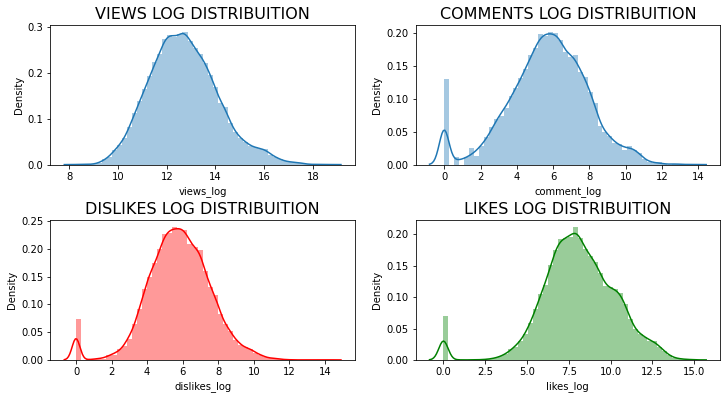

In [6]:
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [7]:
print("Views quantiles")
print(df_yout['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_yout['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_yout['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_yout['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       18801.51
0.25      123915.50
0.50      304586.00
0.75      799291.25
0.99    13305944.98
Name: views, dtype: float64

Likes quantiles
0.01         0.00
0.25       864.00
0.50      3069.00
0.75     13774.25
0.99    432675.00
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25      108.00
0.50      326.00
0.75     1019.25
0.99    21373.36
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25       81.00
0.50      329.00
0.75     1285.00
0.99    42380.28
Name: comment_count, dtype: float64


In [8]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

Category Name count
Entertainment       16712
News & Politics      5241
Music                3858
Comedy               3429
People and Blogs     2624
Name: category_name, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


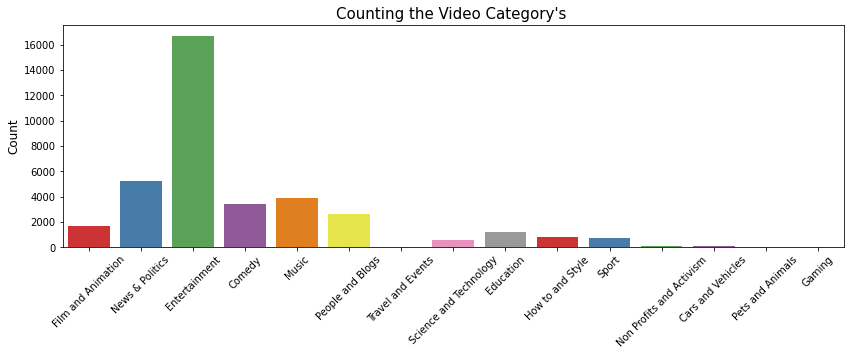

In [9]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos


<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

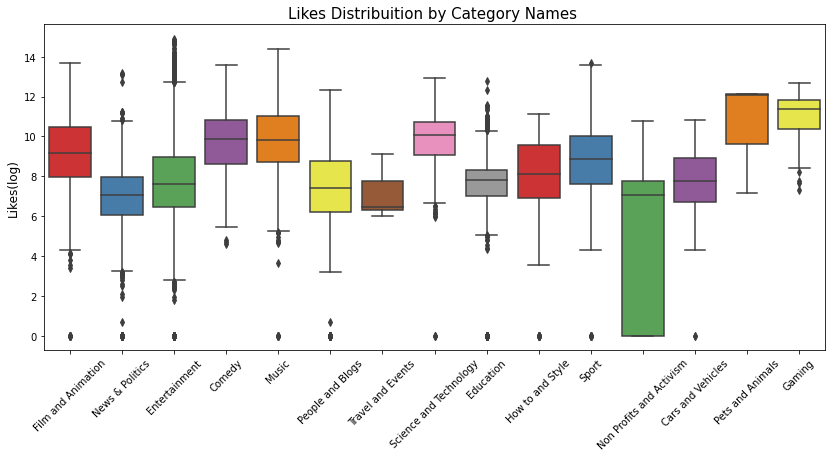

In [10]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

News and Politics have a the same of Non Profits of engagement likes

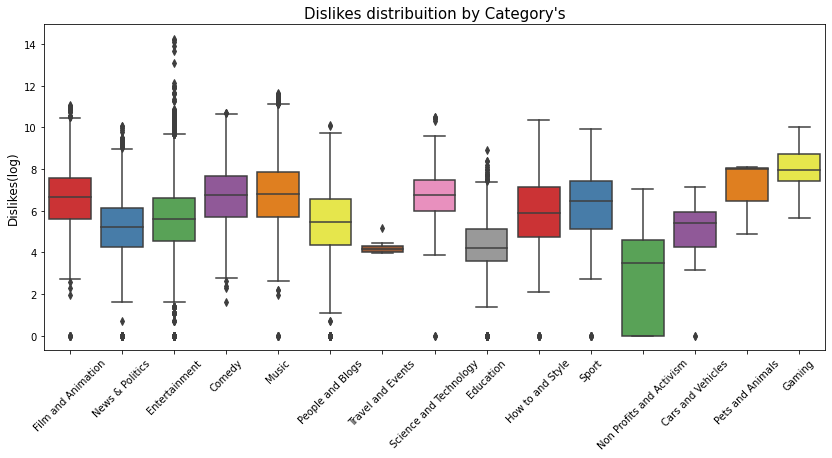

In [11]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

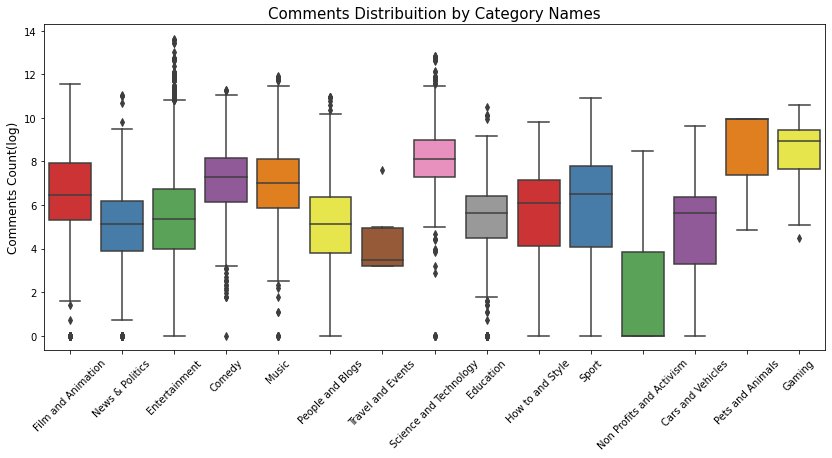

In [12]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

<h1>Engagement Features </h1>

I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [13]:
df_yout['like_rate'] =  df_yout ['likes'] / df_yout['views'] * 100
df_yout['dislike_rate'] =  df_yout ['dislikes'] / df_yout['views'] * 100
df_yout['comment_rate'] =  df_yout ['comment_count'] / df_yout['views'] * 100

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

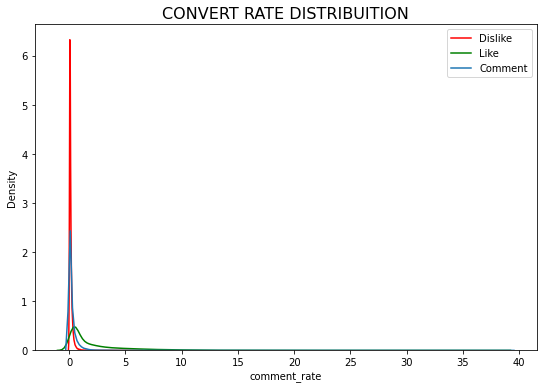

In [14]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_yout['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_yout['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_yout['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal"

The mean of ike distribuition is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.

And at the Comment rate we can see the how-to category with the highest rates of commments. Interesting because isn't politics LOL

<h2>Looking through the anothers categoricals variables </h2>
We have the variables:
- Comments Disable
- Rating disable
- Video error


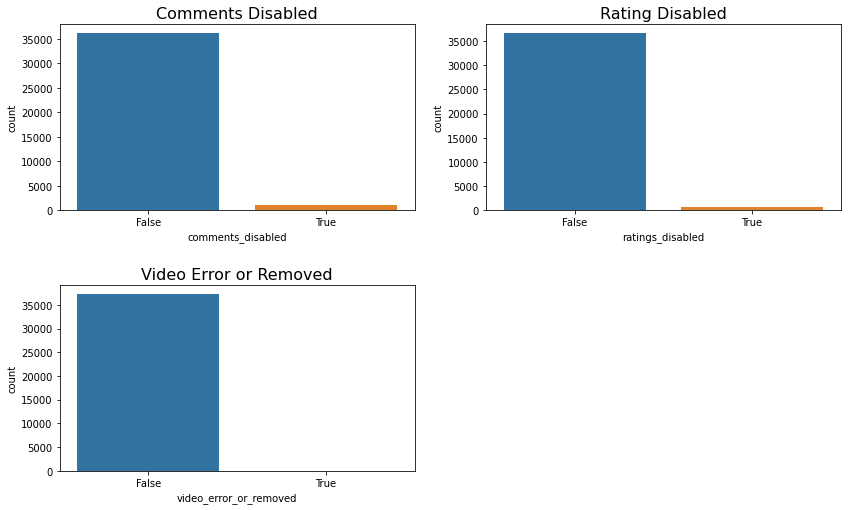

In [15]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_yout)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_yout)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_yout)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

<h2>Let's look the kde of this variables separated to deep understand them</h2>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

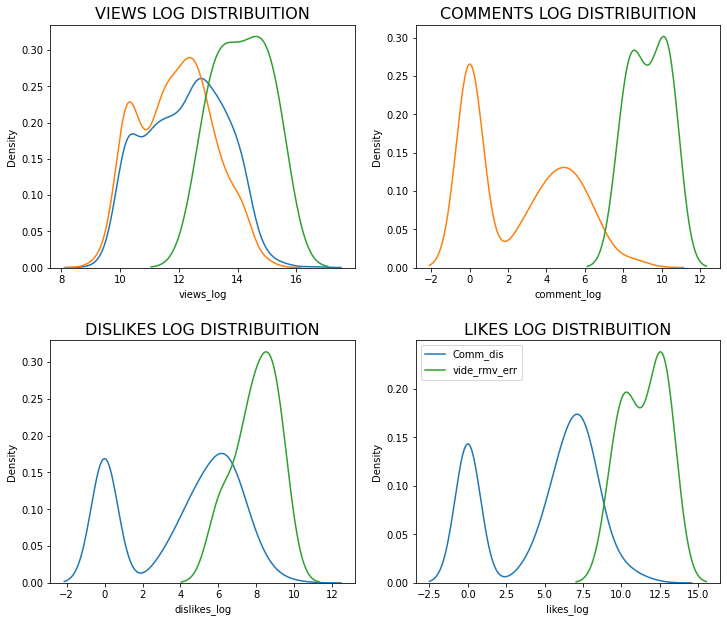

In [16]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

Removed videos no have some views until be moreved... <br>Rating disable and Comments disable have the same distribuition 

<h2>Analysing the Correlation Matrix of the numerical variables</h2>

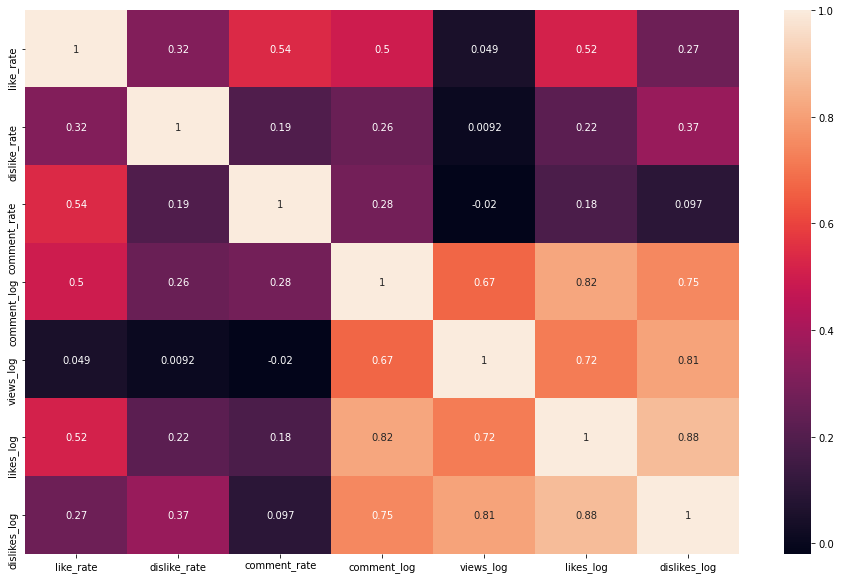

In [19]:
plt.figure(figsize = (16,10))

#Let's verify the correlation of each value
sns.heatmap(df_yout[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

<h2>Let's verify the correlation of title and tags values with views</h2>
- exploring the Correlation matrix to see if have any interesting relation

In [ ]:
plt.figure(figsize = (16,10))

sns.heatmap(df_yout[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

<h1>Visualizing  the Word Cloud of Tagged videos </h1>
- Ratings Disable 
- Comments Disable
- Video Error or Removed

In [20]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

<h3>Rating Disabled</h3>

<h3>Comments Disabled</h3>

I will continue implementing this analysis because I want learn about text data! <br>

Thank you very much for your view and <b> votes up</b> my kernel 

In [23]:
df_yout['publish_time'] = pd.to_datetime(df_yout['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
12    5754
5     5666
3     5436
1     5389
2     4766
Name: month, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


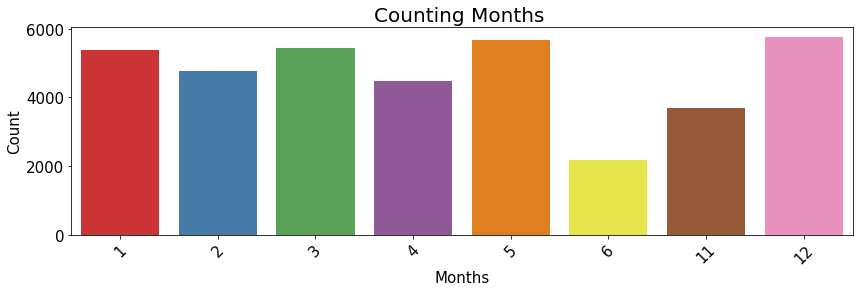

In [26]:
df_yout['month'] = df_yout['publish_time'].dt.month

print("Category Name count")
print(df_yout['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

## Let's extract the hour value of datetime'

In [27]:
# separates date and time into two columns from 'publish_time' column
df_yout.insert(4, 'publish_date', df_yout['publish_time'].dt.date)
df_yout['publish_time'] = df_yout['publish_time'].dt.time
df_yout[['hour','min','sec']] = df_yout['publish_time'].astype(str).str.split(':', expand=True).astype(int)

## Knowning the Hour feature

TOP 5 Hour values
14    2838
12    2782
13    2631
6     2323
11    2295
Name: hour, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


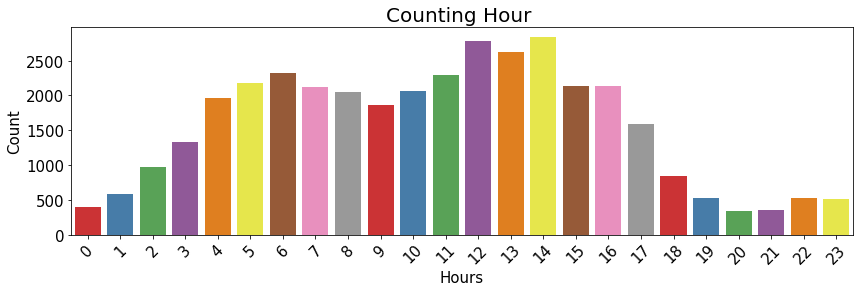

In [29]:
print("TOP 5 Hour values")
print(df_yout['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()